# Small-world effect and scale-free networks

In [1]:
import csv
import pyreadr
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

## Function for calculate clustering, average shortest path and avarage degree.

In [2]:
def clustering_coefficient(G):
    return nx.average_clustering(G)

def average_shortest_path_length(G):
    # compute the strongly connected components of the graph
    components = nx.strongly_connected_components(G_conflicts)

    # compute the average shortest path length for each component
    avg_shortest_path_lengths = []
    for component in components:
        subgraph = G.subgraph(component)
        avg_shortest_path_length = nx.average_shortest_path_length(subgraph)
        avg_shortest_path_lengths.append(avg_shortest_path_length)

    # compute the overall average shortest path length
    overall_avg_shortest_path_length = sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)

    # print the results
    return overall_avg_shortest_path_length, avg_shortest_path_lengths

def average_degree(G):
    degree_sequence = sorted([d for n, d in G_conflicts.degree()], reverse=True)
    degree_count = nx.degree_histogram(G)
    
    return degree_count

In [3]:
# Read tsv file
r_body = pd.read_csv('soc-redditHyperlinks-body.tsv', sep='\t')
r_title = pd.read_csv('soc-redditHyperlinks-title.tsv', sep='\t')

# Merge two dataframes
r = pd.concat([r_body, r_title])
r = r.drop(['PROPERTIES'], axis=1)

r_neg = r[r['LINK_SENTIMENT'] == -1]
r_pos = r[r['LINK_SENTIMENT'] == 1]

In [4]:
conflicts = r_neg.groupby(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']).size().reset_index(name='counts')
conflicts = conflicts.sort_values(by=['counts'], ascending=False)
conflicts = conflicts[conflicts['counts'] > 10]
conflicts.head(10)


full = r.groupby(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']).size().reset_index(name='counts')
full = full.sort_values(by=['counts'], ascending=False)

pos = r_pos.groupby(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']).size().reset_index(name='counts')
pos = pos.sort_values(by=['counts'], ascending=False)

neg = r_neg.groupby(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']).size().reset_index(name='counts')
neg = neg.sort_values(by=['counts'], ascending=False)

## 4 principal networks

In [5]:
G_conflicts = nx.from_pandas_edgelist(conflicts, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', edge_attr='counts', create_using=nx.DiGraph())
G_full = nx.from_pandas_edgelist(full, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', edge_attr='counts', create_using=nx.DiGraph())
G_pos = nx.from_pandas_edgelist(pos, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', edge_attr='counts', create_using=nx.DiGraph())
G_neg = nx.from_pandas_edgelist(neg, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', edge_attr='counts', create_using=nx.DiGraph())

## Clustering coefficient

In [6]:
clustering_coefficient_conflicts = clustering_coefficient(G_conflicts)
clustering_coefficient_full = clustering_coefficient(G_full)
clustering_coefficient_pos = clustering_coefficient(G_pos)
clustering_coefficient_neg = clustering_coefficient(G_neg)

print("clustering coefficient of conflicts graph: ", clustering_coefficient_conflicts)
print("clustering coefficient of full graph: ", clustering_coefficient_full)
print("clustering coefficient of positive graph: ", clustering_coefficient_pos)
print("clustering coefficient of negative graph: ", clustering_coefficient_neg)

clustering coefficient of conflicts graph:  0.0911497280117941
clustering coefficient of full graph:  0.1687098959412832
clustering coefficient of positive graph:  0.16515131810665948
clustering coefficient of negative graph:  0.09001973215192774


## Overall avarage path length

In [7]:
overall_avg_shortest_path_length_conflicts,avg_shortest_path_lengths_conflicts = average_shortest_path_length(G_conflicts)
overall_avg_shortest_path_length_full,avg_shortest_path_lengths_full = average_shortest_path_length(G_full)
overall_avg_shortest_path_length_pos,avg_shortest_path_lengths_pos = average_shortest_path_length(G_pos)
overall_avg_shortest_path_length_neg,avg_shortest_path_lengths_neg = average_shortest_path_length(G_neg)

print("average shortest path length of conflicts graph: ", overall_avg_shortest_path_length_conflicts)
print("average shortest path length of full graph: ", overall_avg_shortest_path_length_full)
print("average shortest path length of positive graph: ", overall_avg_shortest_path_length_pos)
print("average shortest path length of negative graph: ", overall_avg_shortest_path_length_neg)

print("average shortest path length of conflicts graph: ", avg_shortest_path_lengths_conflicts)
print("average shortest path length of full graph: ", avg_shortest_path_lengths_full)
print("average shortest path length of positive graph: ", avg_shortest_path_lengths_pos)
print("average shortest path length of negative graph: ", avg_shortest_path_lengths_neg)

average shortest path length of conflicts graph:  0.01937984496124031
average shortest path length of full graph:  0.017764857881136954
average shortest path length of positive graph:  0.017764857881136954
average shortest path length of negative graph:  0.01802325581395349
average shortest path length of conflicts graph:  [0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Power law and free-scale networks

average degree of conflicts graph:  [0, 288, 90, 48, 30, 15, 8, 10, 6, 3, 2, 3, 1, 2, 4, 1, 0, 3, 3, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
average degree of full graph:  [0, 32052, 10711, 5499, 3401, 2202, 1579, 1210, 959, 842, 672, 584, 465, 438, 355, 333, 262, 250, 216, 224, 169, 186, 140, 156, 145, 138, 145, 122, 103, 99, 95, 76, 81, 99, 69, 62, 75, 66, 72, 63, 68, 60, 62, 55, 59, 41, 45, 54, 39, 37, 37, 47, 33, 35, 35, 33, 36, 43, 37, 2

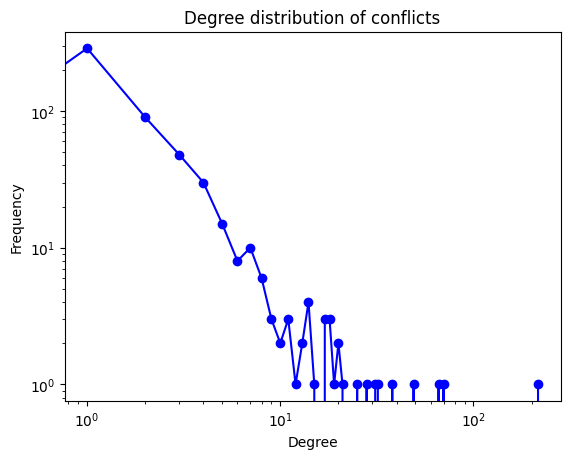

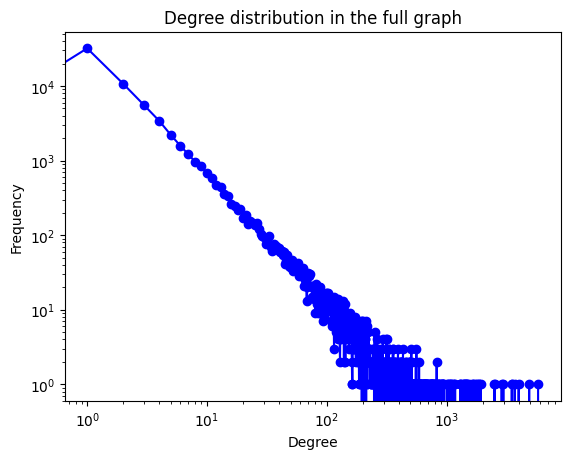

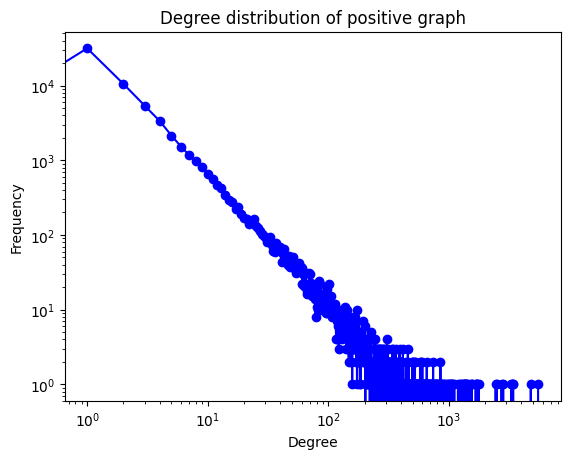

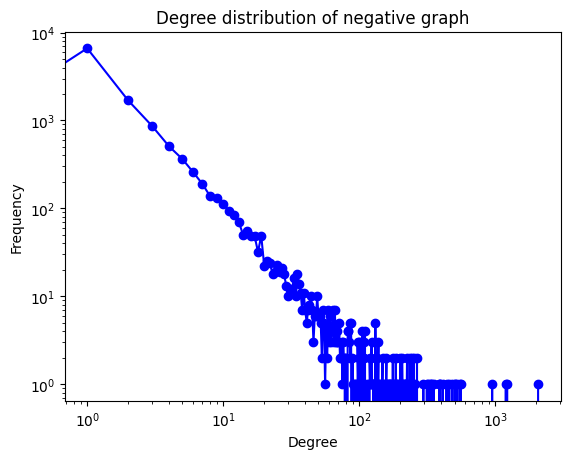

In [8]:
average_degree_conflicts = average_degree(G_conflicts)
average_degree_full = average_degree(G_full)
average_degree_pos = average_degree(G_pos)
average_degree_neg = average_degree(G_neg)

print("average degree of conflicts graph: ", average_degree_conflicts)
print("average degree of full graph: ", average_degree_full)
print("average degree of positive graph: ", average_degree_pos)
print("average degree of negative graph: ", average_degree_neg)


# plot the degree distribution bar chart
plt.loglog(average_degree_conflicts, 'b-', marker='o')
plt.title("Degree distribution of conflicts")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

plt.loglog(average_degree_full, 'b-', marker='o')
plt.title("Degree distribution in the full graph")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

plt.loglog(average_degree_pos, 'b-', marker='o')
plt.title("Degree distribution of positive graph")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

plt.loglog(average_degree_neg, 'b-', marker='o')
plt.title("Degree distribution of negative graph")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()